# Image Classification of Fashion MNIST and MNIST Datasets
My initial exploration of image classification with Keras on the well-known [Fashion MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) and [MNIST](http://yann.lecun.com/exdb/mnist/) datasets.


### Load necessary Python packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Load the Fashion MNIST dataset:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Data preparation:
Set class names and normalize the data.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

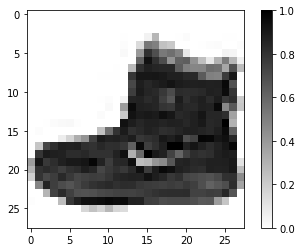

In [5]:
# Let's take a look at the first image in the train set
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

### Build the model

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(.25),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Train the model and evaluate accuracy on the test dataset

In [8]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6468 - accuracy: 0.7681
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4070 - accuracy: 0.8497
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3748 - accuracy: 0.8617
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3491 - accuracy: 0.8692
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3338 - accuracy: 0.8746
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3203 - accuracy: 0.8811
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3047 - accuracy: 0.8874
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3052 - accuracy: 0.8856
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2865 - accuracy: 0.8899
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.282

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8882

Test accuracy: 0.8881999850273132


### Make Predictions and View Them


In [10]:
predictions = model.predict(test_images)

In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

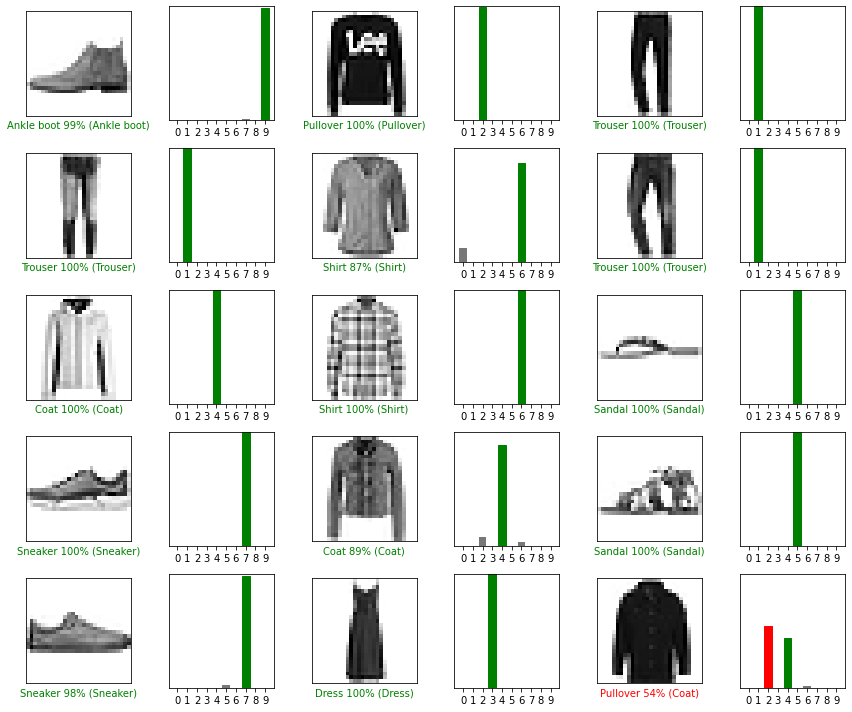

In [12]:
# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in green and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Classifying the MNIST dateset.

In [13]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

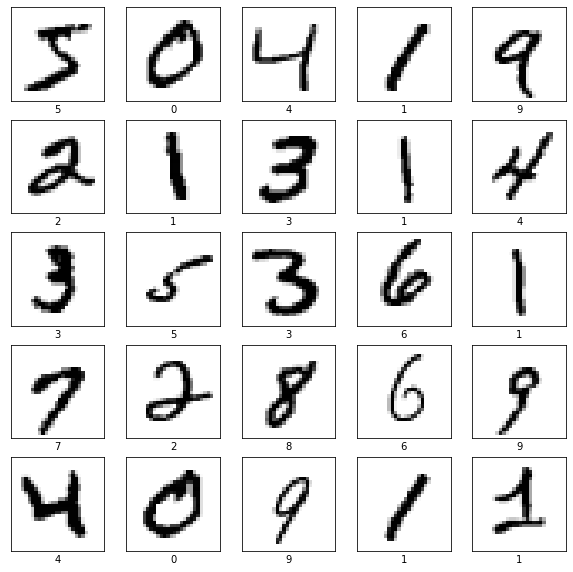

In [15]:
# Let's view the first 25 images in training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(.25),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
model2.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3993 - accuracy: 0.8780
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1246 - accuracy: 0.9614
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0877 - accuracy: 0.9725
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0725 - accuracy: 0.9765
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0605 - accuracy: 0.9810
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0538 - accuracy: 0.9821
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0487 - accuracy: 0.9841
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0433 - accuracy: 0.9859
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0394 - accuracy: 0.9870
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.034

In [20]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9819

Test accuracy: 0.9818999767303467
